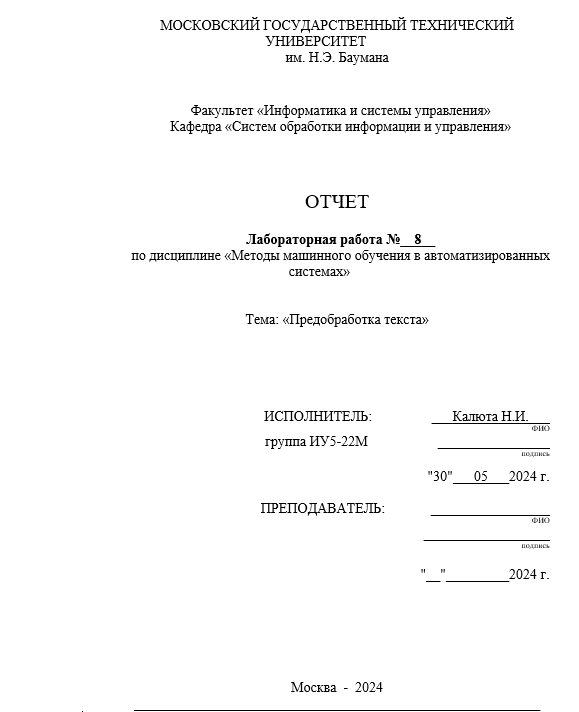

###**Цель лабораторной работы:**
Изучение методов предобработки текстов.

###**Задание:**

Для произвольного предложения или текста решить следующие задачи:

* Токенизация.
* Частеречная разметка.
* Лемматизация.
* Выделение (распознавание) именованных сущностей.
* Разбор предложения.

# Ход работы

## Установка зависимостей

Установка библиотек Python, которые используются для обработки естественного языка (NLP)

In [1]:
!pip install nltk
!pip install razdel
!pip install navec
!pip install slovnet
!pip install natasha
!pip install setuptools
!pip install ipymarkup

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 49.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=34f1cf10510c5956c1b45856ae5ef4802002d114c30c9e5188bc82c57966b9d8
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=8e90c7819e095a80bdc41463435ea184d144910b2265acfc254796910dd07086
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built docopt intervaltree


Импорт библиотеки NLTK (Natural Language Toolkit) и  инициализирует токенизатор  "punkt"  для английского языка

In [2]:
import nltk
from nltk.tokenize import punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Импорт библиотек

In [3]:
from razdel import tokenize, sentenize
from navec import Navec
from slovnet import Morph
from natasha import Doc, Segmenter, NewsEmbedding, NewsMorphTagger, MorphVocab
from slovnet import NER
from ipymarkup import show_span_ascii_markup as show_markup
from natasha import NewsSyntaxParser

## Исходные данные

In [4]:
text = """Самое большое количество английских вкраплений обнаруживается в критике и публицистике Пушкина и в его письмах, поменьше — в поэзии, еще меньше — в прозе. Что представляют собой эти вкрапления? Во-первых, это имена писателей: Byron, Walter Scott, Wordsworth, Southy, Shakespeare, Walpole, Coleridge и др., при этом английская форма имени сохраняется и в русском, и
в английском текстах. Так же Пушкин пишет и имена литературных героев: Child-Harold, Manfred, Lalla-Rookh. Прямые цитаты служат в основном эпиграфами, в текстах их крайне мало"""

## Токенизация

In [5]:
nltk_tk = nltk.WordPunctTokenizer()
nltk_tk.tokenize(text)

['Самое',
 'большое',
 'количество',
 'английских',
 'вкраплений',
 'обнаруживается',
 'в',
 'критике',
 'и',
 'публицистике',
 'Пушкина',
 'и',
 'в',
 'его',
 'письмах',
 ',',
 'поменьше',
 '—',
 'в',
 'поэзии',
 ',',
 'еще',
 'меньше',
 '—',
 'в',
 'прозе',
 '.',
 'Что',
 'представляют',
 'собой',
 'эти',
 'вкрапления',
 '?',
 'Во',
 '-',
 'первых',
 ',',
 'это',
 'имена',
 'писателей',
 ':',
 'Byron',
 ',',
 'Walter',
 'Scott',
 ',',
 'Wordsworth',
 ',',
 'Southy',
 ',',
 'Shakespeare',
 ',',
 'Walpole',
 ',',
 'Coleridge',
 'и',
 'др',
 '.,',
 'при',
 'этом',
 'английская',
 'форма',
 'имени',
 'сохраняется',
 'и',
 'в',
 'русском',
 ',',
 'и',
 'в',
 'английском',
 'текстах',
 '.',
 'Так',
 'же',
 'Пушкин',
 'пишет',
 'и',
 'имена',
 'литературных',
 'героев',
 ':',
 'Child',
 '-',
 'Harold',
 ',',
 'Manfred',
 ',',
 'Lalla',
 '-',
 'Rookh',
 '.',
 'Прямые',
 'цитаты',
 'служат',
 'в',
 'основном',
 'эпиграфами',
 ',',
 'в',
 'текстах',
 'их',
 'крайне',
 'мало']

Токенизация по предложениям

In [6]:
nltk_tk_sents = nltk.tokenize.sent_tokenize(text)
print(len(nltk_tk_sents))
nltk_tk_sents

5


['Самое большое количество английских вкраплений обнаруживается в критике и публицистике Пушкина и в его письмах, поменьше — в поэзии, еще меньше — в прозе.',
 'Что представляют собой эти вкрапления?',
 'Во-первых, это имена писателей: Byron, Walter Scott, Wordsworth, Southy, Shakespeare, Walpole, Coleridge и др., при этом английская форма имени сохраняется и в русском, и\nв английском текстах.',
 'Так же Пушкин пишет и имена литературных героев: Child-Harold, Manfred, Lalla-Rookh.',
 'Прямые цитаты служат в основном эпиграфами, в текстах их крайне мало']

Токенайзер **slovnet**

In [7]:
n_tok_text = list(tokenize(text))
n_tok_text

[Substring(0, 5, 'Самое'),
 Substring(6, 13, 'большое'),
 Substring(14, 24, 'количество'),
 Substring(25, 35, 'английских'),
 Substring(36, 46, 'вкраплений'),
 Substring(47, 61, 'обнаруживается'),
 Substring(62, 63, 'в'),
 Substring(64, 71, 'критике'),
 Substring(72, 73, 'и'),
 Substring(74, 86, 'публицистике'),
 Substring(87, 94, 'Пушкина'),
 Substring(95, 96, 'и'),
 Substring(97, 98, 'в'),
 Substring(99, 102, 'его'),
 Substring(103, 110, 'письмах'),
 Substring(110, 111, ','),
 Substring(112, 120, 'поменьше'),
 Substring(121, 122, '—'),
 Substring(123, 124, 'в'),
 Substring(125, 131, 'поэзии'),
 Substring(131, 132, ','),
 Substring(133, 136, 'еще'),
 Substring(137, 143, 'меньше'),
 Substring(144, 145, '—'),
 Substring(146, 147, 'в'),
 Substring(148, 153, 'прозе'),
 Substring(153, 154, '.'),
 Substring(155, 158, 'Что'),
 Substring(159, 171, 'представляют'),
 Substring(172, 177, 'собой'),
 Substring(178, 181, 'эти'),
 Substring(182, 192, 'вкрапления'),
 Substring(192, 193, '?'),
 Substr

In [8]:
list(sentenize(text))

[Substring(0,
           154,
           'Самое большое количество английских вкраплений обнаруживается в критике и публицистике Пушкина и в его письмах, поменьше — в поэзии, еще меньше — в прозе.'),
 Substring(155, 193, 'Что представляют собой эти вкрапления?'),
 Substring(194,
           386,
           'Во-первых, это имена писателей: Byron, Walter Scott, Wordsworth, Southy, Shakespeare, Walpole, Coleridge и др., при этом английская форма имени сохраняется и в русском, и\nв английском текстах.'),
 Substring(387,
           471,
           'Так же Пушкин пишет и имена литературных героев: Child-Harold, Manfred, Lalla-Rookh.'),
 Substring(472,
           540,
           'Прямые цитаты служат в основном эпиграфами, в текстах их крайне мало')]

Создадим набор токенов для каждого предложения отдельно для дальнейшей работы:

In [9]:
n_sen_chunk = []
for sent in sentenize(text):
    tokens = [_.text for _ in tokenize(sent.text)]
    n_sen_chunk.append(tokens)


In [10]:
n_sen_chunk

[['Самое',
  'большое',
  'количество',
  'английских',
  'вкраплений',
  'обнаруживается',
  'в',
  'критике',
  'и',
  'публицистике',
  'Пушкина',
  'и',
  'в',
  'его',
  'письмах',
  ',',
  'поменьше',
  '—',
  'в',
  'поэзии',
  ',',
  'еще',
  'меньше',
  '—',
  'в',
  'прозе',
  '.'],
 ['Что', 'представляют', 'собой', 'эти', 'вкрапления', '?'],
 ['Во-первых',
  ',',
  'это',
  'имена',
  'писателей',
  ':',
  'Byron',
  ',',
  'Walter',
  'Scott',
  ',',
  'Wordsworth',
  ',',
  'Southy',
  ',',
  'Shakespeare',
  ',',
  'Walpole',
  ',',
  'Coleridge',
  'и',
  'др',
  '.',
  ',',
  'при',
  'этом',
  'английская',
  'форма',
  'имени',
  'сохраняется',
  'и',
  'в',
  'русском',
  ',',
  'и',
  'в',
  'английском',
  'текстах',
  '.'],
 ['Так',
  'же',
  'Пушкин',
  'пишет',
  'и',
  'имена',
  'литературных',
  'героев',
  ':',
  'Child-Harold',
  ',',
  'Manfred',
  ',',
  'Lalla-Rookh',
  '.'],
 ['Прямые',
  'цитаты',
  'служат',
  'в',
  'основном',
  'эпиграфами',
  ',',

## Частеричная разметка

In [11]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_news_v1_1B_250K_300d_100q.tar
!wget https://storage.yandexcloud.net/natasha-slovnet/packs/slovnet_morph_news_v1.tar

--2024-05-29 21:40:52--  https://storage.yandexcloud.net/natasha-navec/packs/navec_news_v1_1B_250K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26634240 (25M) [application/x-tar]
Saving to: ‘navec_news_v1_1B_250K_300d_100q.tar’

navec_news_v1_1B_25 100%[===================>]  25.40M  11.3MB/s    in 2.2s    

2024-05-29 21:40:55 (11.3 MB/s) - ‘navec_news_v1_1B_250K_300d_100q.tar’ saved [26634240/26634240]

--2024-05-29 21:40:55--  https://storage.yandexcloud.net/natasha-slovnet/packs/slovnet_morph_news_v1.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2580480 (2.5M) [appli

In [12]:
navec = Navec.load('navec_news_v1_1B_250K_300d_100q.tar')
n_morph = Morph.load('slovnet_morph_news_v1.tar', batch_size=4)

In [13]:
morph_res = n_morph.navec(navec)

In [14]:
def print_pos(markup):
    for token in markup.tokens:
        print('{} - {}'.format(token.text, token.tag))

In [15]:
n_text_markup = list(_ for _ in n_morph.map(n_sen_chunk))
[print_pos(x) for x in n_text_markup]

Самое - ADJ|Animacy=Inan|Case=Acc|Degree=Pos|Gender=Neut|Number=Sing
большое - ADJ|Case=Nom|Degree=Pos|Gender=Neut|Number=Sing
количество - NOUN|Animacy=Inan|Case=Nom|Gender=Neut|Number=Sing
английских - ADJ|Case=Gen|Degree=Pos|Number=Plur
вкраплений - NOUN|Animacy=Inan|Case=Gen|Gender=Masc|Number=Plur
обнаруживается - VERB|Aspect=Imp|Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Mid
в - ADP
критике - NOUN|Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing
и - CCONJ
публицистике - NOUN|Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing
Пушкина - PROPN|Animacy=Anim|Case=Gen|Gender=Masc|Number=Sing
и - CCONJ
в - ADP
его - DET
письмах - NOUN|Animacy=Inan|Case=Loc|Gender=Neut|Number=Plur
, - PUNCT
поменьше - ADV|Degree=Cmp
— - PUNCT
в - ADP
поэзии - NOUN|Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing
, - PUNCT
еще - ADV|Degree=Pos
меньше - NUM|Degree=Cmp
— - PUNCT
в - ADP
прозе - NOUN|Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing
. - PUNCT
Что - PRON|Animacy=Inan|Case=Acc|Gender=Neut|Number

[None, None, None, None, None]

## Лемматизация

In [16]:
def n_lemmatize(text):
    emb = NewsEmbedding()
    morph_tagger = NewsMorphTagger(emb)
    segmenter = Segmenter()
    morph_vocab = MorphVocab()
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
    return doc

In [17]:
n_doc = n_lemmatize(text)
{_.text: _.lemma for _ in n_doc.tokens}

{'Самое': 'самый',
 'большое': 'большой',
 'количество': 'количество',
 'английских': 'английский',
 'вкраплений': 'вкрапление',
 'обнаруживается': 'обнаруживаться',
 'в': 'в',
 'критике': 'критика',
 'и': 'и',
 'публицистике': 'публицистика',
 'Пушкина': 'пушкин',
 'его': 'его',
 'письмах': 'письмо',
 ',': ',',
 'поменьше': 'маленький',
 '—': '—',
 'поэзии': 'поэзия',
 'еще': 'еще',
 'меньше': 'меньше',
 'прозе': 'проза',
 '.': '.',
 'Что': 'что',
 'представляют': 'представлять',
 'собой': 'себя',
 'эти': 'этот',
 'вкрапления': 'вкрапление',
 '?': '?',
 'Во-первых': 'во-первых',
 'это': 'это',
 'имена': 'имя',
 'писателей': 'писатель',
 ':': ':',
 'Byron': 'byron',
 'Walter': 'walter',
 'Scott': 'scott',
 'Wordsworth': 'wordsworth',
 'Southy': 'southy',
 'Shakespeare': 'shakespeare',
 'Walpole': 'walpole',
 'Coleridge': 'coleridge',
 'др': 'др',
 'при': 'при',
 'этом': 'это',
 'английская': 'английский',
 'форма': 'форма',
 'имени': 'имя',
 'сохраняется': 'сохраняться',
 'русском': 'р

## Выделение (распознавание) именованных сущностей

Загрузка файла с обученной моделью для распознавания именованных сущностей (NER) из хранилища Яндекс Cloud

In [18]:
!wget https://storage.yandexcloud.net/natasha-slovnet/packs/slovnet_ner_news_v1.tar

--2024-05-29 21:41:16--  https://storage.yandexcloud.net/natasha-slovnet/packs/slovnet_ner_news_v1.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2385920 (2.3M) [application/octet-stream]
Saving to: ‘slovnet_ner_news_v1.tar’

slovnet_ner_news_v1 100%[===================>]   2.28M  2.18MB/s    in 1.0s    

2024-05-29 21:41:18 (2.18 MB/s) - ‘slovnet_ner_news_v1.tar’ saved [2385920/2385920]



Распознавание именованных сущностей (NER) в тексте text с использованием загруженной модели.

In [19]:
ner = NER.load('slovnet_ner_news_v1.tar')
ner_res = ner.navec(navec)
markup_ner = ner(text)

Выделение именованных сущностей

In [20]:
markup_ner

SpanMarkup(
    text='Самое большое количество английских вкраплений обнаруживается в критике и публицистике Пушкина и в его письмах, поменьше — в поэзии, еще меньше — в прозе. Что представляют собой эти вкрапления? Во-первых, это имена писателей: Byron, Walter Scott, Wordsworth, Southy, Shakespeare, Walpole, Coleridge и др., при этом английская форма имени сохраняется и в русском, и\nв английском текстах. Так же Пушкин пишет и имена литературных героев: Child-Harold, Manfred, Lalla-Rookh. Прямые цитаты служат в основном эпиграфами, в текстах их крайне мало',
    spans=[Span(
         start=87,
         stop=94,
         type='PER'
     ),
     Span(
         start=226,
         stop=231,
         type='ORG'
     ),
     Span(
         start=233,
         stop=245,
         type='ORG'
     ),
     Span(
         start=247,
         stop=257,
         type='ORG'
     ),
     Span(
         start=259,
         stop=265,
         type='ORG'
     ),
     Span(
         start=267,
         

Визуализация результаты работы алгоритма распознавания именованных сущностей

In [21]:
show_markup(markup_ner.text, markup_ner.spans)

Самое большое количество английских вкраплений обнаруживается в 
критике и публицистике Пушкина и в его письмах, поменьше — в поэзии, 
                       PER────                                       
еще меньше — в прозе. Что представляют собой эти вкрапления? Во-
первых, это имена писателей: Byron, Walter Scott, Wordsworth, Southy, 
                             ORG──  ORG─────────  ORG───────  ORG───  
Shakespeare, Walpole, Coleridge и др., при этом английская форма имени
ORG────────  ORG────  ORG──────                                       
 сохраняется и в русском, и
в английском текстах. Так же Пушкин пишет и имена литературных героев:
                             PER───                                   
 Child-Harold, Manfred, Lalla-Rookh. Прямые цитаты служат в основном 
 ORG─────────  ORG────  ORG────────                                  
эпиграфами, в текстах их крайне мало


## Разбор предложения

Создаём объект NewsEmbedding, который представляет собой модель для получения векторных представлений слов (эмбеддингов), а затем используем эту модель для инициализации синтаксического анализатора NewsSyntaxParser

In [22]:
emb = NewsEmbedding()
syntax_parser = NewsSyntaxParser(emb)

Синтаксический анализ текста, представленного в объекте n_doc, и затем вывод синтаксического деревоъа для третьего предложения этого текста

In [23]:
n_doc.parse_syntax(syntax_parser)
n_doc.sents[2].syntax.print()

  ┌────────────────────► Во-первых   parataxis
  │                      ,           
  │                   ┌► это         nsubj
  │               ┌─┌─└─ имена       
  │               │ └──► писателей   nmod
  │               │   ┌► :           punct
┌─│ ┌─┌─┌─┌─┌─┌─┌─└►┌─└─ Byron       nsubj
│ │ │ │ │ │ │ │ │   │ ┌► ,           punct
│ │ │ │ │ │ │ │ │   └►└─ Walter      conj
│ │ │ │ │ │ │ │ │   └──► Scott       flat:foreign
│ │ │ │ │ │ │ │ │     ┌► ,           punct
│ │ │ │ │ │ │ │ └────►└─ Wordsworth  conj
│ │ │ │ │ │ │ │       ┌► ,           punct
│ │ │ │ │ │ │ └──────►└─ Southy      conj
│ │ │ │ │ │ │         ┌► ,           punct
│ │ │ │ │ │ └────────►└─ Shakespeare conj
│ │ │ │ │ │           ┌► ,           punct
│ │ │ │ │ └──────────►└─ Walpole     conj
│ │ │ │ │             ┌► ,           punct
│ │ │ │ └────────────►└─ Coleridge   conj
│ │ │ │               ┌► и           cc
│ │ │ └──────────────►└─ др          conj
│ │ └──────────────────► .           punct
│ │           ┌──────

##Вывод
В ходе выполнения лабораторной работы познакомился с  основами  обработки  естественного  языка  (NLP)  на  Python  с  использованием  библиотек  NLTK,  Razdel,  Navec,  Slovnet  и  Natasha.  Я  научился  выполнять  такие  операции,  как:

* Токенизация и сегментация текста: Разбиение текста на предложения и слова.
* Морфологический анализ: Определение части речи, рода, числа и других грамматических характеристик слов.
* Лемматизация: Приведение слов к их основной форме.
* Разметка именованных сущностей (NER): Выделение именованных сущностей в тексте, таких как имена людей, организаций и мест.
* Синтаксический анализ: Анализ грамматической структуры предложений.
Я  также  узнал  о  различных  моделях  и  ресурсах  для  NLP,  таких  как  Navec  и  Slovnet,  и  о  возможностях  их  использования  в  различных  задачах.

Эти  знания  помогут  мне  в  будущем  реализовывать  более  сложные  NLP-проекты.